# `ThaiSum` Dataset Exploration

This notebook presents initial data analysis of ThaiSum dataset originally created by [Nakhun Chumpolsathien](https://www.linkedin.com/in/nakhun). Articles in this dataset are from several Thai news websites namely [Thairath](https://www.thairath.co.th/home), [ThaiPBS](https://www.thaipbs.or.th/home), [Prachatai](https://prachatai.com/) and [The Standard](https://thestandard.co/).


**Note:** Because ThaiSum dataset is a large-scale dataset, it takes long time to process all the texts from starch. I, therefore, pre-processed the data beforehand for the analysis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
font = '/content/drive/MyDrive/Projects/ThaiSum-Dataset/THSarabunNew.ttf' # Download from https://www.f0nt.com/release/th-sarabun-new/
sns.set_theme()

In [2]:
thaisum = pd.read_csv('/content/drive/My Drive/Projects/ThaiSum-Dataset/published-version/thaisum.csv')

## 1. Elements of the `ThaiSum`



In [3]:
print(f"ThaSum dataset contains {len(thaisum)} documents.")
thaisum.sample(n=3)

ThaSum dataset contains 358868 documents.


,title,body,summary,type,tags,url
129850,การปกครองท้องถินแบบมีส่วนร่วมเปรียบเทียบไทย - ...,หลักการสำคัญของการปกครองในระบอบประชาธิปไตยคือ...,ชื่อบทความเดิม: ประชาธิปไตยท้องถิ่นและการมีส่ว...,การเมือง,"การกระจายอำนาจ,การปกครองส่วนท้องถิ่น,การเมืองก...",https://prachatai.com/journal/2012/03/39516
312179,มอบตัวแล้ว พ่อค้าต้มเลือดหมูปืนดุ ฉุนลูกค้าทำถ...,ความคืบหน้ากรณี นายสัญญา จันทร์เลิศธนา อายุ 53...,เข้ามอบตัวแล้ว เจ้าของร้านขายเกาเหลาเลือดหมูคล...,"ข่าว,อาชญากรรม","พ่อค้าต้มเลือดหมู,ฉุนทำถ้วยหาย,กระหน่ำยิง,เกาเ...",https://www.thairath.co.th/news/crime/930495
332542,บิ๊กโจ๊ก บุกจับเฒ่าสวิส ครอบครองคลิปโป๊เด็ก ติ...,เวลา 14.00 น. วันที่ 23 พ.ค. พล.ต.ต.สุรเชษฐ์ ห...,รองผบช.ทท. บุกรวบชายชาวต่างชาติ ครอบครองสื่อลา...,"ข่าว,อาชญากรรม","หนังโป๊เด็ก,จับฝรั่งมีหนังโป๊,ฝรั่งโหลดหนังโป๊...",https://www.thairath.co.th/news/crime/1289751


Values in `type` and	`tags	` can be null especially articles from The Standard. 

In [4]:
thaisum.query('tags.isnull() & type.isnull()', engine='python').sample(n=3)

,title,body,summary,type,tags,url
264935,Mekhong ร่วมส่งต่อค็อกเทลสัญชาติไทยสู่เวทีระดั...,จบไปแล้วเป็นที่เรียบร้อยสำหรับการแข่งขัน Mekho...,สิ่งสำคัญที่วงการเครื่องดื่มทั่วโลกให้ความสนใจ...,NaN,NaN,https://thestandard.co/mekhong-thai-spirit-coc...
255837,Street Bite: ‘ข้าวต้มแห้งเฮียหนวด’ ข้าวแห้งเคร...,หากเอ่ยคำว่า ข้าวแห้ง หรือ ข้าวต้มแห้ง เชื่อว่...,ใช้ข้าวเสาไห้ผสมกับข้าวหอมมะลิหุงอย่างดี โปะด...,NaN,NaN,https://thestandard.co/khao-tom-haeng-hea-nuad/
225440,Street Food: จัดจ้านย่านเอกมัย ‘Phed Mark เผ็ด...,ยามที่ต้องนึกถึงอาหารจานเดียวแบบเร่งด่วนสักจาน...,ผัดกะเพราของเผ็ดมาร์คมีเนื้อสัตว์ให้เลือกสองชน...,NaN,NaN,https://thestandard.co/phed-mark/


## 2. Share of Article Sources in `ThaiSum`

In [5]:
thairath = thaipbs = thestandard = prachathai = 0  #initialize the variables

for index, row in tqdm(thaisum.iterrows(), total=thaisum.shape[0]):

  if 'thairath.co.th' in row["url"]: 
    thairath = thairath + 1
  elif 'thaipbs.or.th' in row["url"]:
    thaipbs = thaipbs + 1 
  elif 'prachatai.com' in row["url"]: 
    prachathai = prachathai + 1
  else:
    thestandard = thestandard + 1

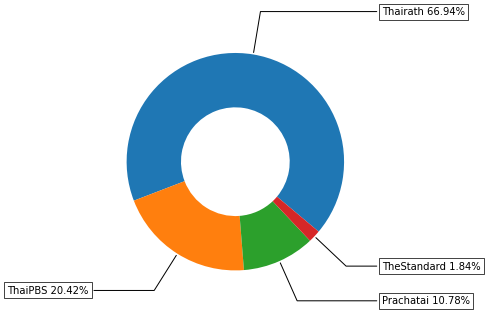


There are  240256  articles from Thairath covering up 66.94829296565868 %
There are  73290  articles from ThaiPBS covering up 20.42255091008393 %
There are  38703  articles from Prachathai covering up 10.78474536598415 %
There are  6619  articles from The Standard covering up 1.844410758273237 %


In [6]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

source = ["Thairath 66.94%",
          "ThaiPBS 20.42%",
          "Prachatai 10.78%",
          "TheStandard 1.84%"]

data = [thairath, thaipbs, prachathai, thestandard]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(source[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()
print()
print("There are ", thairath, " articles from Thairath", 'covering up', (thairath / len(thaisum))*100, '%')
print("There are ", thaipbs, " articles from ThaiPBS", 'covering up', (thaipbs / len(thaisum))*100, '%')
print("There are ", prachathai, " articles from Prachathai", 'covering up', (prachathai / len(thaisum))*100, '%')
print("There are ", thestandard, " articles from The Standard", 'covering up', (thestandard / len(thaisum))*100, '%')

## 3. Word Count Distribution

In [7]:
detail = pd.read_csv('/content/drive/MyDrive/Projects/ThaiSum-Dataset/thaisum-with-date-abs-com.csv')
detail.sample(n=3)

,url,article_length,summary_length,abs_n1,abs_n2,abs_n3,abs_n4,abs_n5,com_rate,published_date
29751,https://www.thairath.co.th/news/local/621930,308.0,44.0,40.000000,81.395349,97.619048,100.000000,100.00000,7.000000,2016-05-18T05:45:00+07:00
72999,https://prachatai.com/journal/2011/11/37720,348.0,26.0,37.500000,96.000000,100.000000,100.000000,100.00000,13.384615,2011-11-03 12:40:00
225927,https://www.thairath.co.th/news/local/northeas...,492.0,37.0,9.090909,44.444444,60.000000,64.705882,69.69697,13.297297,2018-01-24T14:20:00+07:00


In [8]:
detail = pd.read_csv('/content/drive/MyDrive/Projects/ThaiSum-Dataset/ThaiSum-Abs-Com.csv')
print(len(detail))

358868


### 3.1 Word count distribution of **article**

Text(0.5, 8.95999999999998, 'Article Length')

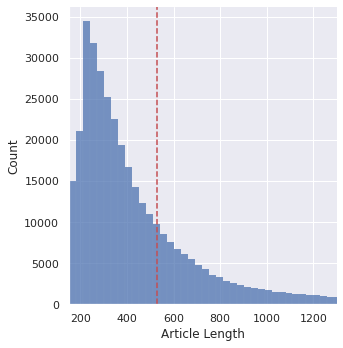

In [9]:
sns.displot(detail, x="article_length", binwidth=30)
plt.axvline(detail['article_length'].mean(),color='r', linestyle='--')
plt.xlim(150,1300)
plt.xlabel("Article Length")

### 3.2 Word count distribution of **summary**

Text(0.5, 8.95999999999998, 'Summary Length')

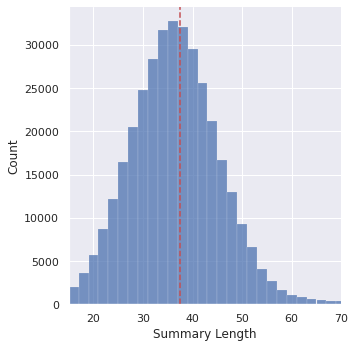

In [10]:
sns.displot(detail, x="summary_length", binwidth=2)
plt.axvline(detail['summary_length'].mean(),color='r', linestyle='--')
plt.xlim(15,70)
plt.xlabel("Summary Length")

## 4. Abstractedness of Articles Grouped by Article Sources


In [11]:
 #initialize the variables
thairath_ab1 = []
thaipbs_ab1 = []
prachatai_ab1 = []
thestandard_ab1 = []

thairath_ab3 = []
thaipbs_ab3 = []
prachatai_ab3 = []
thestandard_ab3 = []

thairath_comrate = []
thaipbs_comrate = []
prachatai_comrate = []
thestandard_comrate = []  

for index, row in tqdm(detail.iterrows(), total=detail.shape[0]):

  if 'thairath' in row["url"]: 
    thairath_ab1.append(row["abs_n1"])
    thairath_ab3.append(row["abs_n3"])
    thairath_comrate.append(row["com_rate"])
  elif 'thaipbs.or.th' in row["url"]:
    thaipbs_ab1.append(row["abs_n1"])
    thaipbs_ab3.append(row["abs_n3"])
    thaipbs_comrate.append(row["com_rate"])
  elif 'prachatai.com' in row["url"]: 
    prachatai_ab1.append(row["abs_n1"])
    prachatai_ab3.append(row["abs_n3"])
    prachatai_comrate.append(row["com_rate"])
  else:
    thestandard_ab1.append(row["abs_n1"])
    thestandard_ab3.append(row["abs_n3"])
    thestandard_comrate.append(row["com_rate"])

(-10.0, 110.0)

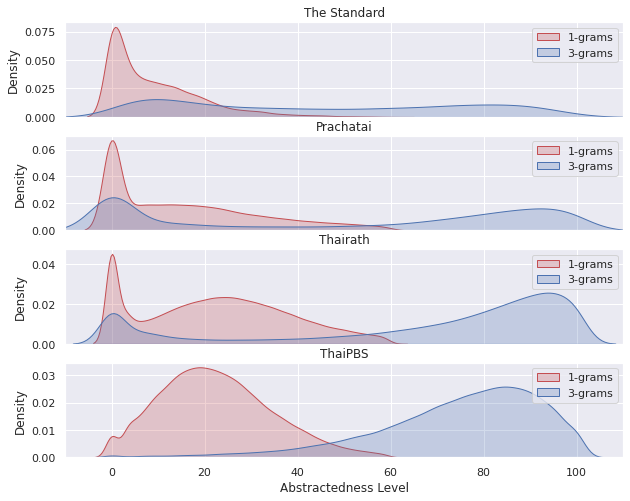

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[1].set_title('Prachatai')
sns.kdeplot(prachatai_ab1, shade=True, color="r", ax=axes[1], label="1-grams")
sns.kdeplot(prachatai_ab3, shade=True, color="b", ax=axes[1], label="3-grams")
axes[1].legend(loc="upper right")

axes[3].set_title('ThaiPBS')
sns.kdeplot(thaipbs_ab1, shade=True, color="r", ax=axes[3], label="1-grams")
sns.kdeplot(thaipbs_ab3, shade=True, color="b", ax=axes[3], label="3-grams")
axes[3].legend(loc="upper right")

axes[2].set_title('Thairath')
sns.kdeplot(thairath_ab1, shade=True, color="r", ax=axes[2], label="1-grams")
sns.kdeplot(thairath_ab3, shade=True, color="b", ax=axes[2], label="3-grams")
axes[2].legend(loc="upper right")

axes[0].set_title('The Standard')
sns.kdeplot(thestandard_ab1, shade=True, color="r", ax=axes[0], label="1-grams")
sns.kdeplot(thestandard_ab3, shade=True, color="b", ax=axes[0], label="3-grams")
axes[0].legend(loc="upper right")

plt.xlabel("Abstractedness Level")
plt.xlim(-10,110)

Collectively, articles from The Standard are the least abstractive and those from ThaiPBS are the most abstractive.

## 5. Compression Rate of Articles Grouped by Article Sources
To define compression rate of the dataset, I calculate the average
length of sentences for both the articles and the
summaries, first. The compression ratio is then defined as the ratio between the average length of
sentences and the average length of summaries.
**The higher the compression ratio, the more difficult the summarization task, as it needs to capture higher levels of abstraction and semantics.** (cite from https://arxiv.org/pdf/1810.09305.pdf)

([<matplotlib.axis.XTick at 0x7f568c3458d0>,
 [Text(0, 0, 'ThaiPBS'),
  Text(0, 0, 'Thairath'),
  Text(0, 0, 'TheStandard'),
  Text(0, 0, 'Prachatai')])

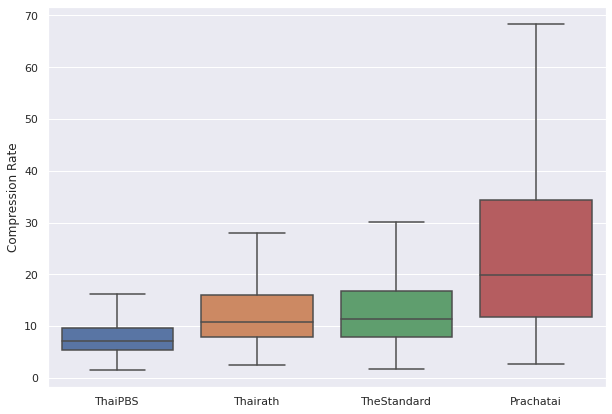

In [13]:
all_arr = [np.asarray(thaipbs_comrate),
           np.asarray(thairath_comrate),
           np.asarray(thestandard_comrate),
           np.asarray(prachatai_comrate)]
plt.figure(figsize=(10,7))
sns.boxplot(data=all_arr, showfliers=False)
plt.ylabel("Compression Rate")
plt.xticks([0, 1, 2, 3], ['ThaiPBS', 'Thairath', 'TheStandard', 'Prachatai'])

## 6. Abstractedness of Articles over Times (at 3-grams) 

In [14]:
detail['published_date'] = detail['published_date'].apply(pd.to_datetime).dt.strftime('%Y')

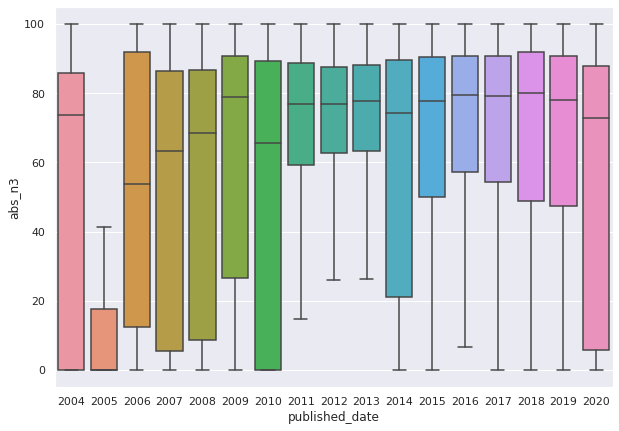

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='published_date',y='abs_n3',
            data=detail,showfliers=False,
            order=['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
                   '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                   '2020'])
plt.xlabel("Pubished Date")

## 7. Number of Articles Grouped by Published Year

Text(0.5, 0, 'Pubished Date')

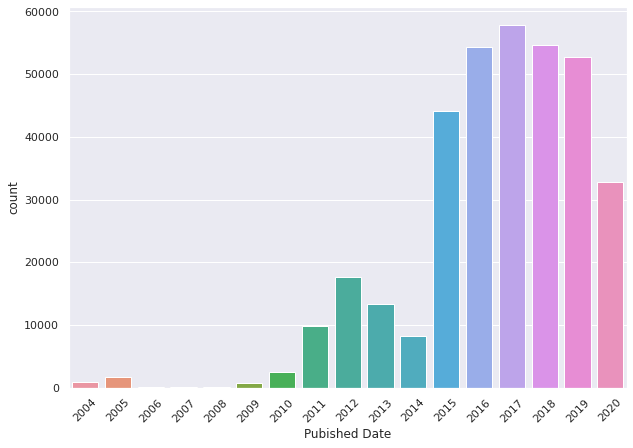

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x="published_date", data=detail,
              order=['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
                   '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                   '2020'])
plt.xticks(rotation=45)
plt.xlabel("Pubished Date")

# 8. Tags and Lebels

In [17]:
label = pd.read_csv('/content/drive/MyDrive/Projects/ThaiSum-Dataset/tag-type-label-2.csv', encoding='utf-8')

In [18]:
label.sample(n=4, random_state=4) 

,tags,type,label,url
42007,"มะเร็ง,มะเร็งตับ,แต่งงานบนเตียงคนไข้,เจ้าสาวป่...","ข่าว,สังคม",society,https://www.thairath.co.th/news/society/1465591
346213,"แก๊งคอลเซ็นเตอร์,รณศิลป์ ภู่สาระ,โอนเงิน,คนร้า...","ข่าว,ทั่วไทย",local,https://www.thairath.co.th/news/local/bangkok/...
195247,NaN,สิ่งแวดล้อม,environment,https://prachatai.com/journal/2004/11/1091
306399,"เจ้าเพชร,อำนาจ เกษตรพัฒนา,ข่าว,ข่าวกีฬา,ไทยรัฐ...",unspecified,sport,https://www.thairath.co.th/content/485811


In [19]:
thaisum_label = []
thaisum_type = []
thaisum_tag = []

for index, row in tqdm(label.iterrows(), total=label.shape[0]):
  label = row['label']
  type_ = row['type']
  thaisum_label.append(label)
  thaisum_type.append(type_)

  if pd.isnull(row['tags']):
    continue
  else:
    tag = row['tags']
    thaisum_tag.append(tag)

### 8.1 Tags

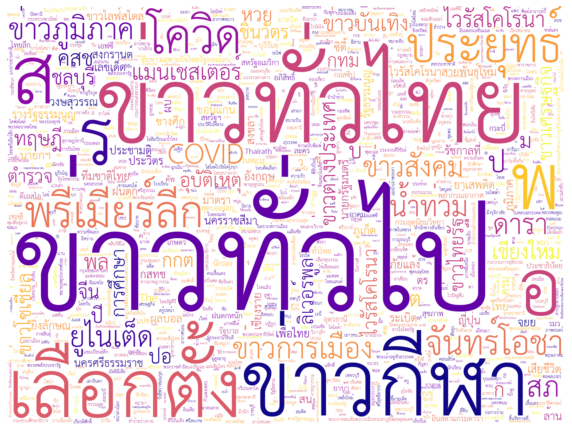

In [20]:
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(font_path=font, 
                      relative_scaling = 0.3,
                      stopwords = ['ไทยรัฐออนไลน์' , 'ไทยรัฐ', 'ThaiPBSnews', 'หนังสือพิมพ์ไทยรัฐ', 
                                   'ข่าว', 'ไทยรัฐฉบับพิมพ์', 'ไทยพีบีเอส', 'ข่าวไทยพีบีเอส', 
                                   'ThaiPB', 'ThaiPBS', 'ข่าวหน้า1', 'ข่าวหน้า', 'ข่าววันนี้'],
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=1000, 
                      colormap='plasma', 
                      scale=2,
                      font_step=2,
                      collocations=False,
                      regexp=regexp,
                      margin=1
                      ).generate("+".join(thaisum_tag))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

### 8.2 Type

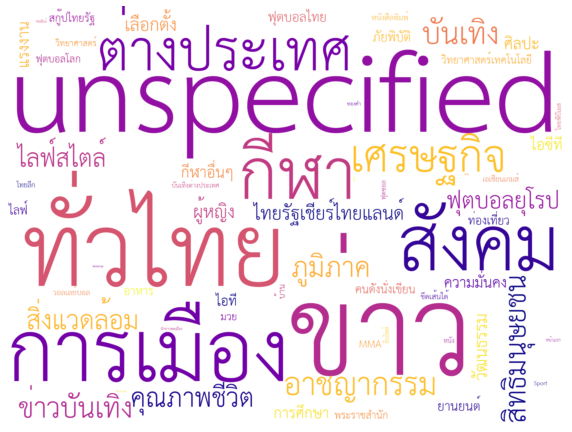

In [21]:
wordcloud = WordCloud(font_path=font, 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      colormap='plasma', 
                      scale=2,
                      font_step=4,
                      collocations=False,
                      regexp=regexp,
                      margin=1
                      ).generate("+".join(thaisum_type))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

### 8.3 Final Label

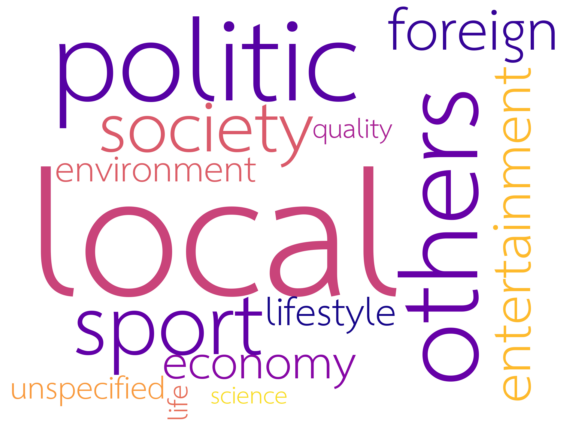

In [22]:
wordcloud = WordCloud(font_path= font, 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      colormap='plasma', 
                      scale=2,
                      font_step=4,
                      collocations=False,
                      regexp=regexp,
                      margin=1
                      ).generate("+".join(thaisum_label))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

## **Extra**: Most Mentioned Provinces of Thailand in `ThaiSum` Dataset 

For the sake of simplicity, เลย, แพร่ and ตาก provinces are omitted because these are homographs. NK and SM stand for Nakhon and Samut respectively. Province and its abbreviation list is taken from [Wikipedia](https://en.wikipedia.org/wiki/Provinces_of_Thailand#The_provinces_and_Administrative_Areas).


In [23]:
df_province = pd.read_csv('/content/drive/MyDrive/Projects/ThaiSum-Dataset/province_count_exclude-tak-pre-loi.csv', encoding='utf-8')

In [24]:
df_province.sample(4)

,abbr,count,province
49,yla,6364,Yala
44,aya,5558,Ayutthaya
55,nbi,6848,Nonthaburi
39,lpg,5072,Lampang


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

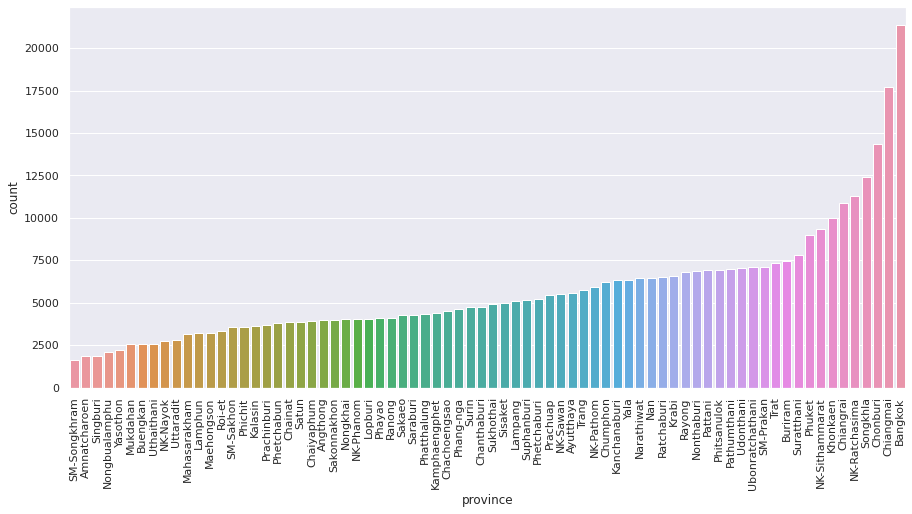

In [25]:
plt.figure(figsize=(15,7))
sns.barplot( x= df_province['province'], y= df_province['count'])
plt.xticks(rotation=90)